Time shape: (15001,)
Phi angles shape: (15001, 1)
Psi angles shape: (15001, 1)


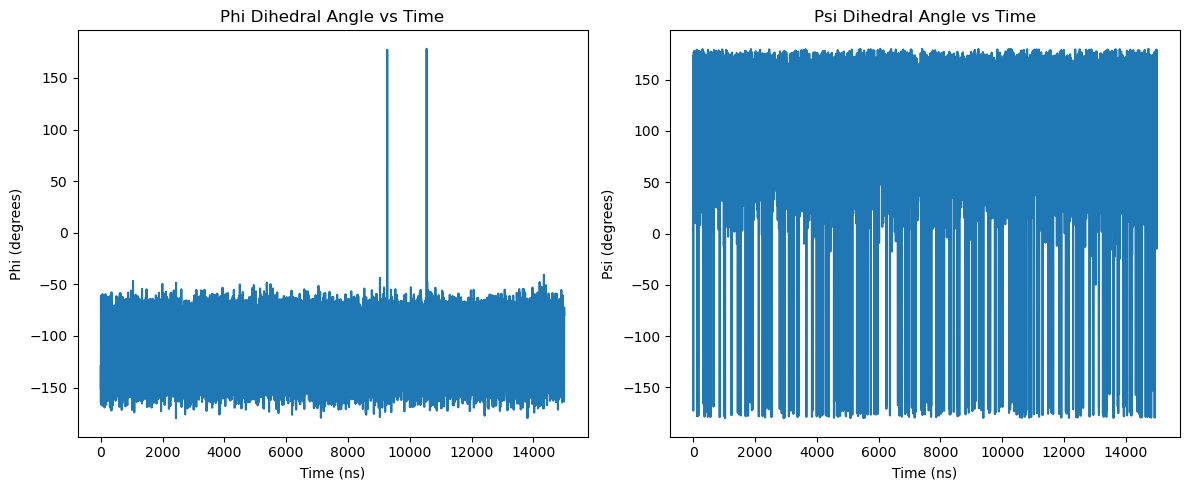

In [23]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology
traj = md.load('adp_exchange3temps.trr', top='adp_exchange3temps.gro')

# Compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert radians to degrees for better interpretation
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# Time array
time = traj.time

# Check the shapes of the arrays
print(f"Time shape: {time.shape}")
print(f"Phi angles shape: {phi_angles_deg.shape}")
print(f"Psi angles shape: {psi_angles_deg.shape}")

# Plot phi and psi vs time
plt.figure(figsize=(12, 5))

# Plot phi
plt.subplot(1, 2, 1)
plt.plot(time[:len(phi_angles_deg)], phi_angles_deg)  # Adjust time array to match the length
plt.title('Phi Dihedral Angle vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (degrees)')

# Plot psi
plt.subplot(1, 2, 2)
plt.plot(time[:len(psi_angles_deg)], psi_angles_deg)  # Adjust time array to match the length
plt.title('Psi Dihedral Angle vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Psi (degrees)')

plt.tight_layout()
plt.show()


In [24]:
phi_angles_deg = np.rad2deg(phi_angles).flatten()  # Flatten to ensure it's a 1D array
psi_angles_deg = np.rad2deg(psi_angles).flatten()  # Flatten to ensure it's a 1D array

In [25]:
def compute_fes(phi, psi, bins=25):
    # Ensure input is a NumPy array
    phi = np.asarray(phi).flatten()
    psi = np.asarray(psi).flatten()

    # Create 2D histogram
    hist, xedges, yedges = np.histogram2d(phi, psi, bins=bins, range=[[-180, 180], [-180, 180]])

    # Compute FES
    fes = -np.log(hist + 1e-10)  # Add small value to avoid log(0)
    fes -= np.min(fes)  # Normalize FES

    return fes, xedges, yedges

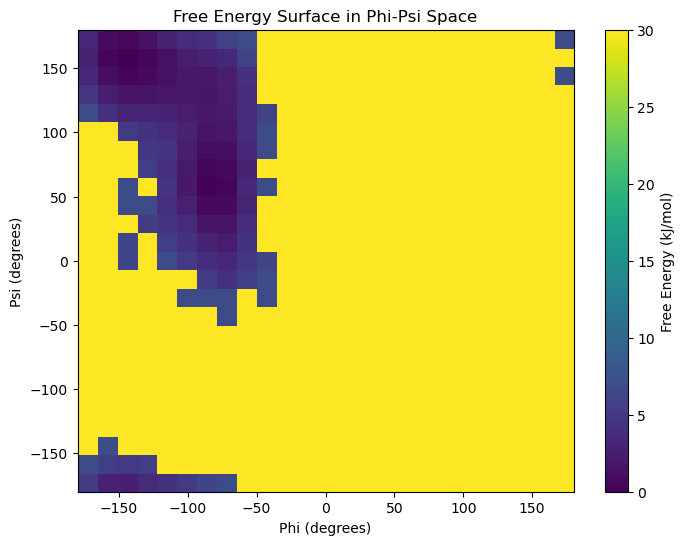

In [26]:
# Load the trajectory and topology
traj = md.load('adp_exchange3temps.trr', top='adp_exchange3temps.gro')

# Compute phi and psi angles
_, phi_angles = md.compute_phi(traj)
_, psi_angles = md.compute_psi(traj)

# Convert radians to degrees for better interpretation
phi_angles_deg = np.rad2deg(phi_angles).flatten()
psi_angles_deg = np.rad2deg(psi_angles).flatten()

# Call the function to compute the FES
fes, xedges, yedges = compute_fes(phi_angles_deg, psi_angles_deg)

# Create a meshgrid for plotting
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# Plot the Free Energy Surface (FES)
plt.figure(figsize=(8, 6))
plt.imshow(fes.T, origin='lower', extent=[-180, 180, -180, 180], cmap='viridis', aspect='auto')
plt.colorbar(label='Free Energy (kJ/mol)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.show()